SECOND APRROACH
TOP_5 FEATURES

 Gradient Boosting (Top 5 Features)
R²   (R-squared):              -0.5407
MSE  (Mean Squared Error):     36036524516920.46
MAPE (Mean Absolute % Error):  52.44%

 Polynomial Regression (Top 5 Poly Features)
R²   (R-squared):              -0.3965
MSE  (Mean Squared Error):     32664430682237.86
MAPE (Mean Absolute % Error):  58.93%

 Linear Regression (Top 5 Features)
R²   (R-squared):              -0.1418
MSE  (Mean Squared Error):     26707822325695.32
MAPE (Mean Absolute % Error):  50.38%

 Random Forest (Top 5 Features)
R²   (R-squared):              -0.2437
MSE  (Mean Squared Error):     29091286019282.12
MAPE (Mean Absolute % Error):  52.35%

 XGBoost (Top 5 Features)
R²   (R-squared):              -0.4952
MSE  (Mean Squared Error):     34973601838449.54
MAPE (Mean Absolute % Error):  51.98%


Top 5 Feature Importances:
AgeClass_2.1: 0.4874
Total_Returns: 0.1587
AgeClass_2.4: 0.0952
AgeClass_1.2: 0.0350
AgeClass_2.3: 0.0339


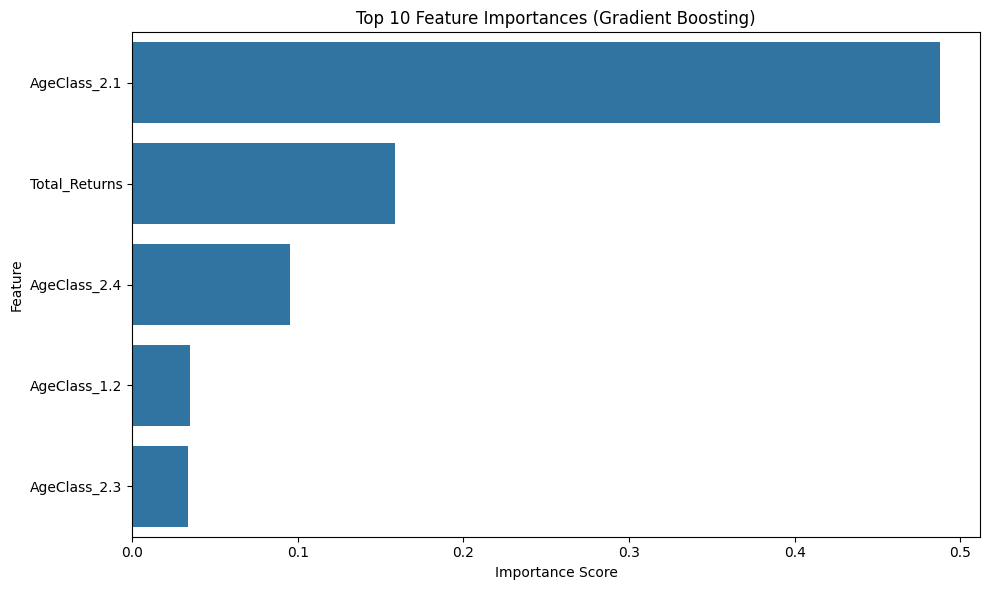


 Gradient Boosting (Top 5 Features)
R²   (R-squared):              -0.5407
MSE  (Mean Squared Error):     36036524516920.46
MAPE (Mean Absolute % Error):  52.44%


In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# File paths
train_path = r"C:\Users\MuriloFarias\Desktop\NNS-JULIA\PredictSalmonRuns\murilo_salmon\BristolBay\SECOND_APPROACH\data_train_encoded.csv"
test_path = r"C:\Users\MuriloFarias\Desktop\NNS-JULIA\PredictSalmonRuns\murilo_salmon\BristolBay\SECOND_APPROACH\data_test_encoded.csv"

# Load datasets
train_loaded = pd.read_csv(train_path)
test_loaded = pd.read_csv(test_path)


X_train = train_loaded.drop('Total_Returns_NextYear', axis=1)
y_train = train_loaded['Total_Returns_NextYear']

X_test = test_loaded.drop('Total_Returns_NextYear', axis=1)
y_test = test_loaded['Total_Returns_NextYear']

#Step 1: Train initial model with all features
gbr_full  = GradientBoostingRegressor(
    n_estimators=200, 
    learning_rate=0.05, 
    max_depth=4, 
    random_state=42
)

#  Train the model
gbr_full.fit(X_train, y_train)

# Step 2: Extract top 10 features
feature_importances = pd.Series(gbr_full.feature_importances_, index=X_train.columns)
top_features = feature_importances.sort_values(ascending=False)
top_5_features = top_features.head(5).index.tolist()

# Print and plot feature importances
print("\nTop 5 Feature Importances:")
for feature in top_5_features:
    print(f"{feature}: {top_features[feature]:.4f}")

plt.figure(figsize=(10, 6))
sns.barplot(x=top_features.head(5).values, y=top_5_features)
plt.title("Top 10 Feature Importances (Gradient Boosting)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

#Step 3: Retrain using only top 10 features

X_train_top5 = X_train[top_5_features]
X_test_top5 = X_test[top_5_features]

gbr_top5 = GradientBoostingRegressor(
    n_estimators=200, 
    learning_rate=0.05, 
    max_depth=4, 
    random_state=42
)
gbr_top5.fit(X_train_top5, y_train)

#Step 4: Predict and evaluate
y_pred = gbr_top5.predict(X_test_top5)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print("\n Gradient Boosting (Top 5 Features)")
print(f"R²   (R-squared):              {r2:.4f}")
print(f"MSE  (Mean Squared Error):     {mse:.2f}")
print(f"MAPE (Mean Absolute % Error):  {mape:.2f}%")


In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
train_path = r"C:\Users\MuriloFarias\Desktop\NNS-JULIA\PredictSalmonRuns\murilo_salmon\BristolBay\SECOND_APPROACH\data_train_encoded.csv"
test_path = r"C:\Users\MuriloFarias\Desktop\NNS-JULIA\PredictSalmonRuns\murilo_salmon\BristolBay\SECOND_APPROACH\data_test_encoded.csv"

df_train = pd.read_csv(train_path)
df_test = pd.read_csv(test_path)

X_train = df_train.drop('Total_Returns_NextYear', axis=1)
y_train = df_train['Total_Returns_NextYear']
X_test = df_test.drop('Total_Returns_NextYear', axis=1)
y_test = df_test['Total_Returns_NextYear']

# 🔹 Step 1: Train using ALL features (poly degree=2)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
feature_names = poly.get_feature_names_out(X_train.columns)

model_full = LinearRegression()
model_full.fit(X_train_poly, y_train)

# 🔹 Step 2: Evaluate full model
y_pred_full = model_full.predict(X_test_poly)
r2_full = r2_score(y_test, y_pred_full)
mse_full = mean_squared_error(y_test, y_pred_full)
mape_full = np.mean(np.abs((y_test - y_pred_full) / y_test)) * 100

print("\n📊 Polynomial Regression (All Features)")
print(f"R²   (R-squared):              {r2_full:.4f}")
print(f"MSE  (Mean Squared Error):     {mse_full:.2f}")
print(f"MAPE (Mean Absolute % Error):  {mape_full:.2f}%")

# 🔹 Step 3: Get top 5 features by absolute coefficient
coef_series = pd.Series(np.abs(model_full.coef_), index=feature_names)
top_5_poly_features = coef_series.sort_values(ascending=False).head(5)
print("\n🔝 Top 5 Most Influential Polynomial Features:")
print(top_5_poly_features)

# 🔹 Step 4: Filter polynomial features to only top 5
top_5_indices = [list(feature_names).index(f) for f in top_5_poly_features.index]

X_train_top5 = X_train_poly[:, top_5_indices]
X_test_top5 = X_test_poly[:, top_5_indices]

# 🔹 Step 5: Retrain with top 5 polynomial features
model_top5 = LinearRegression()
model_top5.fit(X_train_top5, y_train)

# 🔹 Step 6: Evaluate retrained model
y_pred_top5 = model_top5.predict(X_test_top5)
r2_top5 = r2_score(y_test, y_pred_top5)
mse_top5 = mean_squared_error(y_test, y_pred_top5)
mape_top5 = np.mean(np.abs((y_test - y_pred_top5) / y_test)) * 100

print("\n Polynomial Regression (Top 5 Poly Features)")
print(f"R²   (R-squared):              {r2_top5:.4f}")
print(f"MSE  (Mean Squared Error):     {mse_top5:.2f}")
print(f"MAPE (Mean Absolute % Error):  {mape_top5:.2f}%")



📊 Polynomial Regression (All Features)
R²   (R-squared):              -357290.7859
MSE  (Mean Squared Error):     8357134960230387712.00
MAPE (Mean Absolute % Error):  5705.11%

🔝 Top 5 Most Influential Polynomial Features:
AgeClass_0.2 sss_mayaug        1517.271530
Year River_Kvichak             1008.744925
AgeClass_2.4 River_Kvichak      819.899399
AgeClass_0.2 River_Wood         788.380195
AgeClass_0.4 River_Nushagak     736.610706
dtype: float64

 Polynomial Regression (Top 5 Poly Features)
R²   (R-squared):              -0.3965
MSE  (Mean Squared Error):     32664430682237.86
MAPE (Mean Absolute % Error):  58.93%



📊 Linear Regression (All Features)
R²   (R-squared):              -0.1660
MSE  (Mean Squared Error):     27274125813445.65
MAPE (Mean Absolute % Error):  53.27%

🔝 Top 5 Most Influential Features:
River_Kvichak: 2648177.3542
River_Igushik: -1341600.4109
River_Egegik: 1020593.8011
sss_mayaug: -1009081.5910
River_Alagnak: -993085.9482


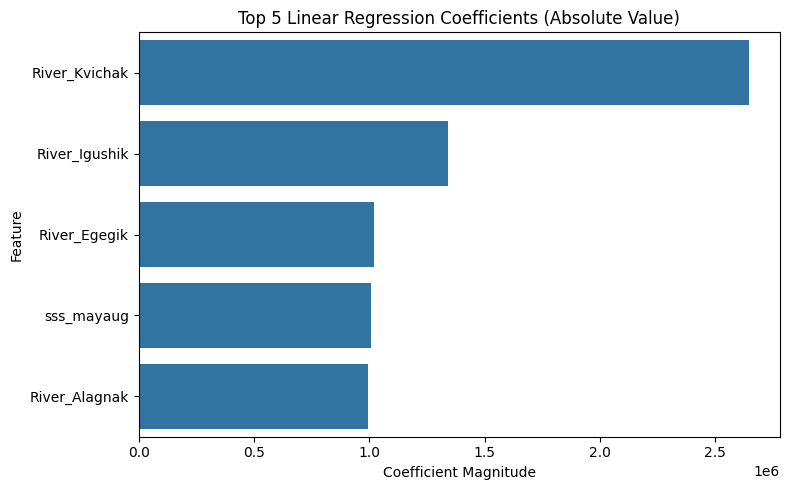


 Linear Regression (Top 5 Features)
R²   (R-squared):              -0.1418
MSE  (Mean Squared Error):     26707822325695.32
MAPE (Mean Absolute % Error):  50.38%


In [3]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# File paths
train_path = r"C:\Users\MuriloFarias\Desktop\NNS-JULIA\PredictSalmonRuns\murilo_salmon\BristolBay\SECOND_APPROACH\data_train_encoded.csv"
test_path = r"C:\Users\MuriloFarias\Desktop\NNS-JULIA\PredictSalmonRuns\murilo_salmon\BristolBay\SECOND_APPROACH\data_test_encoded.csv"

# Load data
df_train = pd.read_csv(train_path)
df_test = pd.read_csv(test_path)

X_train_full = df_train.drop('Total_Returns_NextYear', axis=1)
y_train = df_train['Total_Returns_NextYear']
X_test_full = df_test.drop('Total_Returns_NextYear', axis=1)
y_test = df_test['Total_Returns_NextYear']

# 🔹 Step 1: Train on all features
model_full = LinearRegression()
model_full.fit(X_train_full, y_train)

# 🔹 Step 2: Evaluate full model
y_pred_full = model_full.predict(X_test_full)
r2_full = r2_score(y_test, y_pred_full)
mse_full = mean_squared_error(y_test, y_pred_full)
mape_full = np.mean(np.abs((y_test - y_pred_full) / y_test)) * 100

print("\n📊 Linear Regression (All Features)")
print(f"R²   (R-squared):              {r2_full:.4f}")
print(f"MSE  (Mean Squared Error):     {mse_full:.2f}")
print(f"MAPE (Mean Absolute % Error):  {mape_full:.2f}%")

# 🔹 Step 3: Get top 5 features by coefficient magnitude
coefs = pd.Series(model_full.coef_, index=X_train_full.columns)
top_5_features = coefs.abs().sort_values(ascending=False).head(5).index.tolist()

print("\n🔝 Top 5 Most Influential Features:")
for feature in top_5_features:
    print(f"{feature}: {coefs[feature]:.4f}")

# Optional plot
plt.figure(figsize=(8, 5))
sns.barplot(x=coefs[top_5_features].abs().values, y=top_5_features)
plt.title("Top 5 Linear Regression Coefficients (Absolute Value)")
plt.xlabel("Coefficient Magnitude")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

# 🔹 Step 4: Retrain using only top 5 features
X_train_top5 = X_train_full[top_5_features]
X_test_top5 = X_test_full[top_5_features]

model_top5 = LinearRegression()
model_top5.fit(X_train_top5, y_train)

# 🔹 Step 5: Evaluate top 5 model
y_pred_top5 = model_top5.predict(X_test_top5)
r2_top5 = r2_score(y_test, y_pred_top5)
mse_top5 = mean_squared_error(y_test, y_pred_top5)
mape_top5 = np.mean(np.abs((y_test - y_pred_top5) / y_test)) * 100

print("\n Linear Regression (Top 5 Features)")
print(f"R²   (R-squared):              {r2_top5:.4f}")
print(f"MSE  (Mean Squared Error):     {mse_top5:.2f}")
print(f"MAPE (Mean Absolute % Error):  {mape_top5:.2f}%")



📊 Random Forest (All Features)
R²   (R-squared):              -0.2372
MSE  (Mean Squared Error):     28938065745148.36
MAPE (Mean Absolute % Error):  49.50%

🔝 Top 5 Feature Importances:
AgeClass_2.1     0.530038
Total_Returns    0.218456
AgeClass_1.2     0.023100
AgeClass_1.1     0.019392
AgeClass_3.3     0.019134
dtype: float64


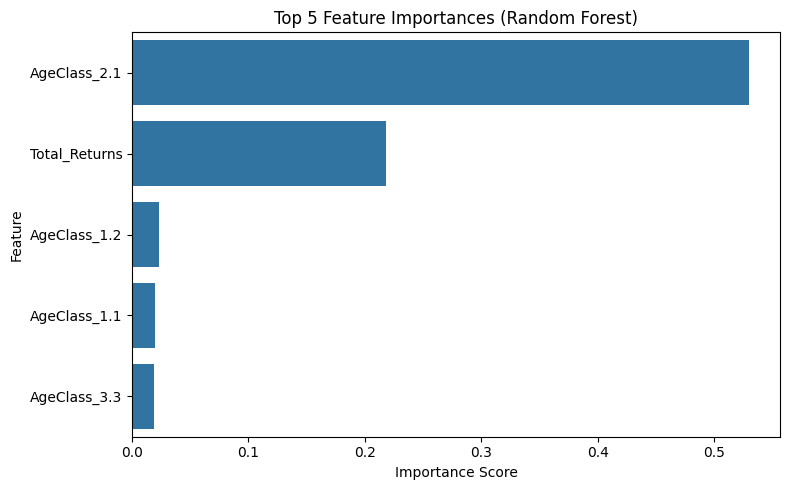


 Random Forest (Top 5 Features)
R²   (R-squared):              -0.2437
MSE  (Mean Squared Error):     29091286019282.12
MAPE (Mean Absolute % Error):  52.35%


In [4]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# File paths (using all features here, not pre-filtered TOP_5)
train_path = r"C:\Users\MuriloFarias\Desktop\NNS-JULIA\PredictSalmonRuns\murilo_salmon\BristolBay\SECOND_APPROACH\data_train_encoded.csv"
test_path = r"C:\Users\MuriloFarias\Desktop\NNS-JULIA\PredictSalmonRuns\murilo_salmon\BristolBay\SECOND_APPROACH\data_test_encoded.csv"

# Load datasets
df_train = pd.read_csv(train_path)
df_test = pd.read_csv(test_path)

X_train_full = df_train.drop('Total_Returns_NextYear', axis=1)
y_train = df_train['Total_Returns_NextYear']
X_test_full = df_test.drop('Total_Returns_NextYear', axis=1)
y_test = df_test['Total_Returns_NextYear']

# 🔹 Step 1: Train using ALL features
rf_full = RandomForestRegressor(n_estimators=100, random_state=42)
rf_full.fit(X_train_full, y_train)

# 🔹 Step 2: Evaluate full model
y_pred_full = rf_full.predict(X_test_full)
r2_full = r2_score(y_test, y_pred_full)
mse_full = mean_squared_error(y_test, y_pred_full)
mape_full = np.mean(np.abs((y_test - y_pred_full) / y_test)) * 100

print("\n📊 Random Forest (All Features)")
print(f"R²   (R-squared):              {r2_full:.4f}")
print(f"MSE  (Mean Squared Error):     {mse_full:.2f}")
print(f"MAPE (Mean Absolute % Error):  {mape_full:.2f}%")

# 🔹 Step 3: Get top 5 features by importance
feature_importances = pd.Series(rf_full.feature_importances_, index=X_train_full.columns)
top_5_features = feature_importances.sort_values(ascending=False).head(5)

print("\n🔝 Top 5 Feature Importances:")
print(top_5_features)

# Plot top 5
plt.figure(figsize=(8, 5))
sns.barplot(x=top_5_features.values, y=top_5_features.index)
plt.title("Top 5 Feature Importances (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

# 🔹 Step 4: Retrain using only top 5 features
X_train_top5 = X_train_full[top_5_features.index]
X_test_top5 = X_test_full[top_5_features.index]

rf_top5 = RandomForestRegressor(n_estimators=100, random_state=42)
rf_top5.fit(X_train_top5, y_train)

# 🔹 Step 5: Evaluate top 5 model
y_pred_top5 = rf_top5.predict(X_test_top5)
r2_top5 = r2_score(y_test, y_pred_top5)
mse_top5 = mean_squared_error(y_test, y_pred_top5)
mape_top5 = np.mean(np.abs((y_test - y_pred_top5) / y_test)) * 100

print("\n Random Forest (Top 5 Features)")
print(f"R²   (R-squared):              {r2_top5:.4f}")
print(f"MSE  (Mean Squared Error):     {mse_top5:.2f}")
print(f"MAPE (Mean Absolute % Error):  {mape_top5:.2f}%")



📊 XGBoost (All Features)
R²   (R-squared):              -0.1194
MSE  (Mean Squared Error):     26183788053661.45
MAPE (Mean Absolute % Error):  43.69%

🔝 Top 5 Feature Importances:
AgeClass_2.1     0.461577
River_Kvichak    0.147304
Total_Returns    0.066753
AgeClass_2.3     0.060563
AgeClass_2.4     0.043788
dtype: float32


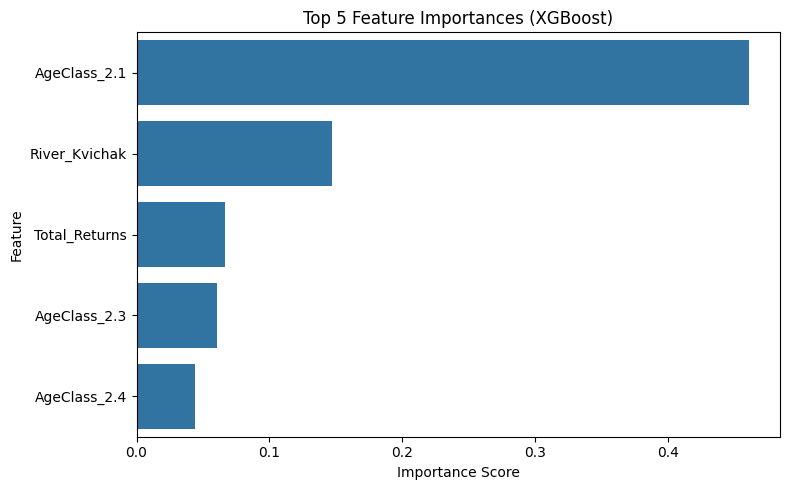


 XGBoost (Top 5 Features)
R²   (R-squared):              -0.4952
MSE  (Mean Squared Error):     34973601838449.54
MAPE (Mean Absolute % Error):  51.98%


In [5]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# File paths — using full feature set (not top_5)
train_path = r"C:\Users\MuriloFarias\Desktop\NNS-JULIA\PredictSalmonRuns\murilo_salmon\BristolBay\SECOND_APPROACH\data_train_encoded.csv"
test_path = r"C:\Users\MuriloFarias\Desktop\NNS-JULIA\PredictSalmonRuns\murilo_salmon\BristolBay\SECOND_APPROACH\data_test_encoded.csv"

# Load datasets
df_train = pd.read_csv(train_path)
df_test = pd.read_csv(test_path)

X_train_full = df_train.drop('Total_Returns_NextYear', axis=1)
y_train = df_train['Total_Returns_NextYear']
X_test_full = df_test.drop('Total_Returns_NextYear', axis=1)
y_test = df_test['Total_Returns_NextYear']

# 🔹 Step 1: Train on all features
xgb_full = XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_full.fit(X_train_full, y_train)

# 🔹 Step 2: Evaluate full model
y_pred_full = xgb_full.predict(X_test_full)
r2_full = r2_score(y_test, y_pred_full)
mse_full = mean_squared_error(y_test, y_pred_full)
mape_full = np.mean(np.abs((y_test - y_pred_full) / y_test)) * 100

print("\n📊 XGBoost (All Features)")
print(f"R²   (R-squared):              {r2_full:.4f}")
print(f"MSE  (Mean Squared Error):     {mse_full:.2f}")
print(f"MAPE (Mean Absolute % Error):  {mape_full:.2f}%")

# 🔹 Step 3: Get top 5 features by importance
feature_importances = pd.Series(xgb_full.feature_importances_, index=X_train_full.columns)
top_5_features = feature_importances.sort_values(ascending=False).head(5)

print("\n🔝 Top 5 Feature Importances:")
print(top_5_features)

# Plot top 5
plt.figure(figsize=(8, 5))
sns.barplot(x=top_5_features.values, y=top_5_features.index)
plt.title("Top 5 Feature Importances (XGBoost)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

# 🔹 Step 4: Retrain with top 5 features
X_train_top5 = X_train_full[top_5_features.index]
X_test_top5 = X_test_full[top_5_features.index]

xgb_top5 = XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_top5.fit(X_train_top5, y_train)

# 🔹 Step 5: Evaluate top 5 model
y_pred_top5 = xgb_top5.predict(X_test_top5)
r2_top5 = r2_score(y_test, y_pred_top5)
mse_top5 = mean_squared_error(y_test, y_pred_top5)
mape_top5 = np.mean(np.abs((y_test - y_pred_top5) / y_test)) * 100

print("\n XGBoost (Top 5 Features)")
print(f"R²   (R-squared):              {r2_top5:.4f}")
print(f"MSE  (Mean Squared Error):     {mse_top5:.2f}")
print(f"MAPE (Mean Absolute % Error):  {mape_top5:.2f}%")
